In [1]:
import pandas as pd                               
import matplotlib.pyplot as plt                   
import seaborn as sns                            
from sklearn.cluster import DBSCAN                # For DBSCAN
import numpy as np                                
from sklearn.preprocessing import StandardScaler  # For standardizing data    
from sklearn.neighbors import NearestNeighbors    # For nearest neighbors
from palmerpenguins import load_penguins  # For penguins dataset

In [2]:
# Loads the penguins dataset
df = load_penguins()

# Drop variables and NaN cases, rename variable
df = df.drop(['island', 'year', 'sex'], axis=1) \
    .dropna() \
    .rename(columns={'species': 'y'})

df = df.reset_index(drop=True) # dropna in above step does adjust the index label, it simply removes whole row,

y = df.y


# Removes the y column from df
df = df.drop('y', axis=1)

#Standardizing the df
df = pd.DataFrame(
    StandardScaler().fit_transform(df),
    columns=df.columns)

df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020


- Determine the DBSCAN parameter values
1. 'min_samples': Minimum number of neighboring points for clustering. 
2. 'eps': Epsilon neighborhood radius

In [3]:
k = 7

# Fits a NearestNeighbors object to df to find pronounced bend (or knee)
nn = NearestNeighbors(n_neighbors=k) \
    .fit(df)

# Finds the distance of k closest neighbors
dist, ind = nn.kneighbors(df)

# Sorts the distances
dist = np.sort(dist, axis=0)[:,1]

- finding optimal value of 'eps' from a plot of distances of min_samples nearest neighbors

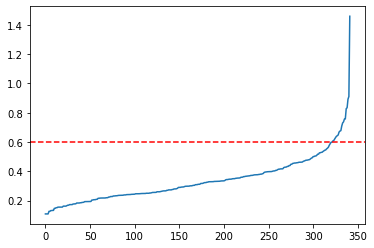

In [4]:
# Plots the distances of 'min_samples', i.e, k
plt.plot(dist)

# Draws a horizontal line at the bend
plt.axhline(y=.6, color='red', ls='--')

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

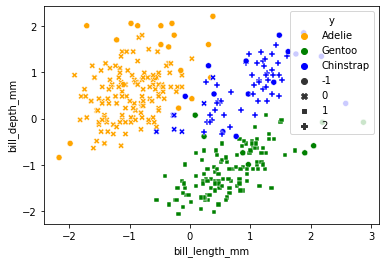

In [5]:
# Fits a DBSCAN object to df
db=DBSCAN(eps=0.6, min_samples=k) \
    .fit(df)

# Scatter plot to visualize the clusters
sns.scatterplot(
    x='bill_length_mm', 
    y='bill_depth_mm',
    data=df, 
    hue=y,
    style=db.labels_,
    palette=['orange', 'green', 'blue'])